In [5]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd

def download_and_extract_data(url):
    # Download the data from the API link
    response = requests.get(url)
    data = response.json()

 
    show_id = data['id']
    show_url = data['url']
    show_name = data['name']
    episodes = data['_embedded']['episodes']

    episode_list = []
    for episode in episodes:
        episode_name = episode['name']
        episode_season = episode['season']
        episode_number = episode['number']
        episode_type = episode['type']
        episode_airdate = episode['airdate']
        episode_airtime = episode['airtime']
        episode_runtime = episode['runtime']
        episode_rating = episode['rating']['average']
        episode_summary = BeautifulSoup(episode['summary'], 'html.parser').get_text()
        episode_image_medium = episode['image']['medium']
        episode_image_original = episode['image']['original']

        episode_info = {
            'ID': show_id,
            'URL': show_url,
            'Name': show_name,
            'Episode Name': episode_name,
            'Season': episode_season,
            'Number': episode_number,
            'Type': episode_type,
            'Airdate': episode_airdate,
            'Airtime': episode_airtime,
            'Runtime': episode_runtime,
            'Rating': episode_rating,
            'Summary': episode_summary,
            'Medium Image': episode_image_medium,
            'Original Image': episode_image_original
        }
        episode_list.append(episode_info)


    df = pd.DataFrame(episode_list)
    return df


In [6]:

url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

df = download_and_extract_data(url)

df


,ID,URL,Name,Episode Name,Season,Number,Type,Airdate,Airtime,Runtime,Rating,Summary,Medium Image,Original Image
0,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Adversary,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Trace Decay,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [8]:
# Optional step : 
output_path = 'movie.csv'
df.to_csv(output_path, index=False)

print("Data loaded and saved as CSV successfully.")

Data loaded and saved as CSV successfully.


In [10]:
df.head(3)

,ID,URL,Name,Episode Name,Season,Number,Type,Airdate,Airtime,Runtime,Rating,Summary,Medium Image,Original Image
0,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [11]:
season_1 = df[df['Season'] == 1]
season_2 = df[df['Season'] == 2]
season_3 = df[df['Season'] == 3]
season_4 = df[df['Season'] == 4]

In [12]:
season_1_ratings = sum(season_1['Rating'])/len(season_1)
season_2_ratings = sum(season_2['Rating'])/len(season_2)
season_3_ratings = sum(season_3['Rating'])/len(season_3)
season_4_ratings = sum(season_4['Rating'])/len(season_4)
season_rating = [season_1_ratings, season_2_ratings, season_3_ratings, season_4_ratings]
season_name = [ 'season_1', 'season_2', 'season_3', 'season_4']



<Axes: >

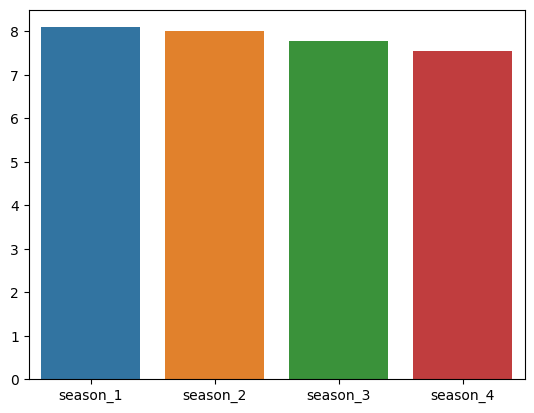

In [13]:
import seaborn as sns 

sns.barplot(data = df, x=season_name, y=season_rating, )

----------

### Get all the episode names, whose average rating is more than 8 for every season: 

In [14]:

df[df['Rating'] > 8][['Episode Name', 'Rating']]

,Episode Name,Rating
6,Trompe L'Oeil,8.6
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7
17,Kiksuya,8.7
18,Vanishing Point,8.4
19,The Passenger,8.5


----

### Get all the episode names that aired before May 2019

In [15]:
df['Airdate'].isnull().sum()

0

In [16]:
import pandas as pd

df['date_column'] = pd.to_datetime(df['Airdate'])

# Filter the DataFrame for data until May 2019
filtered_df = df[df['date_column'] <= '2019-05']
filtered_df[['Episode Name', 'Airdate']]

,Episode Name,Airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


-----

### Get the episode name from each season with the highest and lowest rating: 

In [17]:
season_1 = df[df['Season'] == 1]
season_2 = df[df['Season'] == 2]
season_3 = df[df['Season'] == 3]
season_4 = df[df['Season'] == 4]
list_of_seasons = [season_1, season_2, season_3, season_4]

In [18]:
def low_high_ratings(season):
    """returns Low-High ratings per season"""
    ep_with_low_rat = list(season[season['Rating'] == season['Rating'].min()]['Episode Name'])
    ep_with_high_rat = list(season[season['Rating'] == season['Rating'].max()]['Episode Name'])
    return(
        ep_with_low_rat, ep_with_high_rat
    )


In [23]:
season_no = 1 
for i in list_of_seasons:
    ep_with_low_rat, ep_with_high_rat = low_high_ratings(i)
    print(f"Episodes with Hight ratings for season {season_no}: ", ep_with_high_rat)
    print(f"Episodes with low ratings for season {season_no}: ", ep_with_low_rat)
    season_no +=1 
    print("----------------------------------------")

Episodes with Hight ratings for season 1:  ['The Bicameral Mind']
Episodes with low ratings for season 1:  ['The Stray']
----------------------------------------
Episodes with Hight ratings for season 2:  ['Kiksuya']
Episodes with low ratings for season 2:  ['Akane No Mai']
----------------------------------------
Episodes with Hight ratings for season 3:  ['Parce Domine', 'The Mother of Exiles']
Episodes with low ratings for season 3:  ['Decoherence', 'Passed Pawn']
----------------------------------------
Episodes with Hight ratings for season 4:  ['Zhuangzi']
Episodes with low ratings for season 4:  ['The Auguries']
----------------------------------------


#### Another approach:

In [50]:
df.head(2)

,ID,URL,Name,Episode Name,Season,Number,Type,Airdate,Airtime,Runtime,Rating,Summary,Medium Image,Original Image,date_column
0,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016-10-02
1,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016-10-09


In [25]:
low_rat = df.groupby('Season')['Rating'].min()
high_rat = df.groupby('Season')['Rating'].max()
print(high_rat.items())
print(low_rat.items())

In [57]:
def high_low_rat(high_or_low):
    for season, rating in high_or_low.items():
        print(season, rating)
        episodes = list(df[(df['Season'] == int(season)) & (df['Rating'] == rating)]['Episode Name'])
        print(f"Episodes for season {season}: ", episodes)

In [58]:

high_low_rat(low_rat)

1 7.6
Episodes for season 1:  ['The Stray']
2 7.6
Episodes for season 2:  ['Akane No Mai']
3 7.5
Episodes for season 3:  ['Decoherence', 'Passed Pawn']
4 7.1
Episodes for season 4:  ['The Auguries']


In [59]:
high_low_rat(high_rat)

1 8.7
Episodes for season 1:  ['The Bicameral Mind']
2 8.7
Episodes for season 2:  ['Kiksuya']
3 8.0
Episodes for season 3:  ['Parce Domine', 'The Mother of Exiles']
4 7.8
Episodes for season 4:  ['Zhuangzi']


-------------

### Get the summary for the most popular ( ratings ) episode in every season

In [36]:
high_rating_per_season = df.groupby('Season')['Rating'].max()

In [38]:
episodes_with_high_rat_for_season = []

In [55]:
def summary_of_high_rating(high_rating_per_season):
    for season, rating in high_rating_per_season.items():
        # print(season, rating)
        episodes = list(df[(df['Season'] == int(season)) & (df['Rating'] == rating)]['Episode Name'])
        for i in episodes:
            print(f"Season: {season}, Highest rating: {rating}")
            print(f'{i}:')
            print( df[df['Episode Name'] == i]['Summary'])
            print("-----------------------------")

In [56]:
summary_of_high_rating(high_rating_per_season)

Season: 1, Highest rating: 8.7
The Bicameral Mind:
9    Delores finds out the truth about William's fa...
Name: Summary, dtype: object
-----------------------------
Season: 2, Highest rating: 8.7
Kiksuya:
17    Another of Westworld's Host revolutionaries is...
Name: Summary, dtype: object
-----------------------------
Season: 3, Highest rating: 8.0
Parce Domine:
20    If you're stuck in a loop, try walking in a st...
Name: Summary, dtype: object
-----------------------------
Season: 3, Highest rating: 8.0
The Mother of Exiles:
23    The truth doesn't always set you free.
Name: Summary, dtype: object
-----------------------------
Season: 4, Highest rating: 7.8
Zhuangzi:
32    God is bored.
Name: Summary, dtype: object
-----------------------------


------------